# **Task 3**

## **DJS Synapse Learning Period**
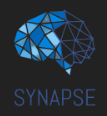

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [36]:
#write code here
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [38]:
df = pd.read_csv("/content/gdrive/My Drive/synapse_w3/titanic_data.csv")

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [39]:
def normalise(df,*col):
  for c in col:
    df[c] = df[c].apply(lambda x: (x - df[c].min())/(df[c].max() - df[c].min()))
  return df  

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1 solution NB
  #return the dataframe
  df["Title"] = df.apply(lambda row: re.search('(\w+)\.', row.Name).group(1), axis = 1)
  df.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True) 
  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Family_members'] = df.apply(lambda row: row['SibSp']+row['Parch'],axis = 1)
  df.drop(['SibSp','Parch','Name','Cabin'],axis = 1,inplace = True)
  df = normalise(df,'Age','Fare','Family_members')
  df = pd.get_dummies(df,columns=['Pclass','Sex','Title','Embarked'])
  return df #remove this line after writing the code

In [42]:
df = titanic_preprocessing_pipeline(df)
df   

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [43]:
#write code here
y = df['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [44]:
#write code here
df.drop('Survived',axis = 1,inplace = True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [74]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size = 30,random_state = 41)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [75]:
#write code here
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

<b>print the test accuracy and train accuracy here</b>

In [76]:
#write code here
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,tree_classifier.predict(X_train)) 
test_acc = accuracy_score(y_test,tree_classifier.predict(X_test))
print(f'Training accuracy : {train_acc}')
print(f'Testing accuracy : {test_acc}') 

Training accuracy : 0.983739837398374
Testing accuracy : 0.9333333333333333


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

params= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [78]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model,
                    param_grid = params,
                    cv = 3,
                    verbose = 2,
                    n_jobs = 4)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 13, 17, 21, 24, 28, 32, 35, 39,
                                          43, 46, 50, 54, 57, 61, 65, 68, 72,
                                          76, 80]},
             verbose=2)

In [79]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 13}

In [80]:
print (f'Train Accuracy - : {grid_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {grid_search.score(X_test,y_test):.3f}')

Train Accuracy - : 0.828
Test Accuracy - : 0.867


### 2. Boosting

In [81]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[10, 50, 100, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm':['SAMME', 'SAMME.R']
}

model = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=10, scoring='accuracy')

grid_result = grid_search.fit(X_train, y_train)

In [82]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}

In [83]:
print (f'Train Accuracy - : {grid_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {grid_search.score(X_test,y_test):.3f}')

Train Accuracy - : 0.832
Test Accuracy - : 0.833


### 3. Pruning Techniques

In [84]:
#write code here
from sklearn.metrics import classification_report,make_scorer
from sklearn.model_selection import ParameterGrid
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
print(classification_report(y_test,tree_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.86      0.88        30
weighted avg       0.91      0.90      0.90        30



In [85]:
ccp_alphas = tree_clf.cost_complexity_pruning_path(X_train,y_train)["ccp_alphas"]
ccp_alphas

array([0.00000000e+00, 2.58097819e-05, 4.83933411e-05, 5.53066755e-05,
       1.01395572e-04, 1.57356412e-04, 1.93573364e-04, 2.32288037e-04,
       3.09717383e-04, 3.48432056e-04, 3.87146729e-04, 3.87146729e-04,
       3.87146729e-04, 3.87146729e-04, 3.87146729e-04, 5.16195638e-04,
       5.40756560e-04, 5.63122514e-04, 5.63122514e-04, 5.72654536e-04,
       6.77506775e-04, 7.18986782e-04, 7.22673893e-04, 7.25900116e-04,
       7.72166277e-04, 7.74293457e-04, 7.74293457e-04, 7.74293457e-04,
       7.74293457e-04, 8.13008130e-04, 8.16837054e-04, 8.42044135e-04,
       8.71080139e-04, 8.71080139e-04, 8.83178475e-04, 8.90437476e-04,
       8.94739106e-04, 9.12560146e-04, 9.29152149e-04, 9.67866822e-04,
       9.75932378e-04, 1.00416183e-03, 1.00426886e-03, 1.00473794e-03,
       1.04010760e-03, 1.04529617e-03, 1.05408017e-03, 1.08885017e-03,
       1.11498258e-03, 1.16144019e-03, 1.18959631e-03, 1.20068845e-03,
       1.23886953e-03, 1.26702566e-03, 1.26702566e-03, 1.36640022e-03,
      

In [86]:
alpha_dict = {"ccp_alpha":[[alpha] for alpha in ccp_alphas]}
grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    scoring = make_scorer(accuracy_score),
    param_grid = ParameterGrid(alpha_dict)
)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7fbaa59bbf90>,
             scoring=make_scorer(accuracy_score))

In [87]:
grid_search.best_params_

{'ccp_alpha': 0.002292393485062525}

In [88]:
best_tree_clf = grid_search.best_estimator_
print (f'Train Accuracy - : {accuracy_score(y_train,best_tree_clf.predict(X_train)):.3f}')
print (f'Test Accuracy - : {accuracy_score(y_test,best_tree_clf.predict(X_test)):.3f}')

Train Accuracy - : 0.887
Test Accuracy - : 0.933


## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


Pruning gave the best reults, hence it resulted in the best model.

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023